<a href="https://colab.research.google.com/github/akhil27/Akhil_INFO5731_SPRING2025/blob/main/Indraganti_Akhil_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


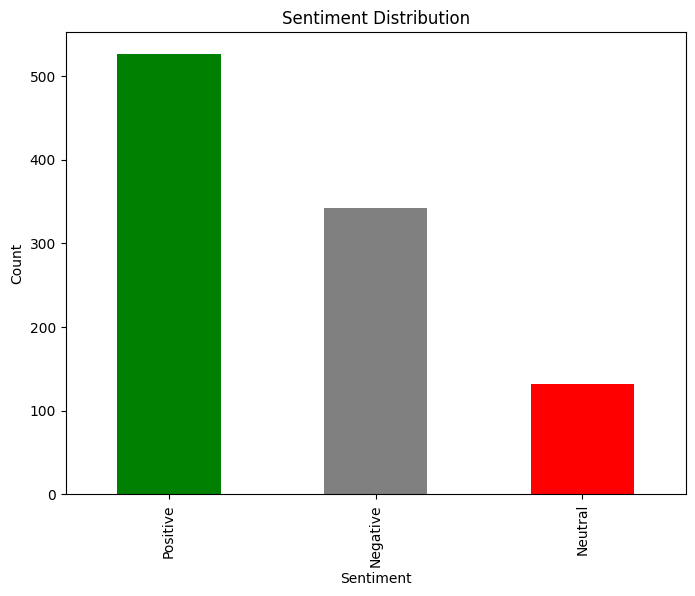

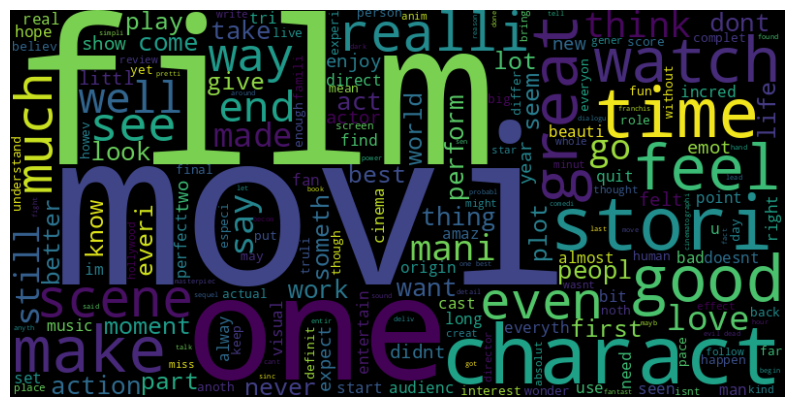

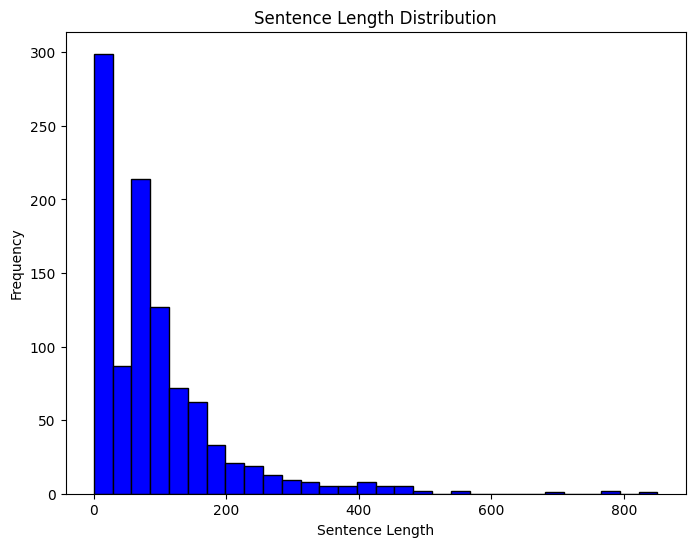

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:40:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Naive Bayes
Accuracy: 0.5200
Precision: 0.4454
Recall: 0.5200
F1 Score: 0.3681
Confusion Matrix: 
[[  2   0  70]
 [  2   0  24]
 [  0   0 102]]

--------------------------------------------------
Model: SVM
Accuracy: 0.5350
Precision: 0.6228
Recall: 0.5350
F1 Score: 0.5470
Confusion Matrix: 
[[23 26 23]
 [ 6  7 13]
 [ 3 22 77]]

--------------------------------------------------
Model: XGBoost
Accuracy: 0.5850
Precision: 0.5656
Recall: 0.5850
F1 Score: 0.5562
Confusion Matrix: 
[[28  3 41]
 [ 9  5 12]
 [15  3 84]]

--------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils.class_weight import compute_class_weight

nltk.download('stopwords')
nltk.download('wordnet')

data_path = 'final_cleaned_reviews.csv'
review_data = pd.read_csv(data_path)

review_data['Content'] = review_data['Content'].fillna('')
review_data['Processed_Text'] = review_data['Processed_Text'].fillna('')

def map_score_to_sentiment(numeric_score):
    if numeric_score > 7:
        return 'Positive'
    elif numeric_score == 7:
        return 'Neutral'
    else:
        return 'Negative'

review_data['Sentiment'] = review_data['Score'].apply(map_score_to_sentiment)

plt.figure(figsize=(8,6))
review_data['Sentiment'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

english_stopwords = set(stopwords.words('english'))
lemmatizer_instance = WordNetLemmatizer()

def clean_and_lemmatize(text_input):
    words = text_input.split()
    cleaned_words = [lemmatizer_instance.lemmatize(word.lower()) for word in words if word.lower() not in english_stopwords]
    return " ".join(cleaned_words)

review_data['Processed_Text'] = review_data['Processed_Text'].apply(clean_and_lemmatize)

combined_text = ' '.join(review_data['Processed_Text'])
word_cloud = WordCloud(width=800, height=400).generate(combined_text)
plt.figure(figsize=(10, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

review_data['Token_Count'] = review_data['Processed_Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,6))
plt.hist(review_data['Token_Count'], bins=30, color='blue', edgecolor='black')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

features = review_data['Processed_Text']
labels = review_data['Sentiment']

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

balanced_weights = compute_class_weight('balanced', classes=np.unique(encoded_labels), y=encoded_labels)
weights_dictionary = dict(zip(np.unique(encoded_labels), balanced_weights))

text_vectorizer = TfidfVectorizer(max_features=10000)

classification_models = {
    'Naive Bayes': make_pipeline(TfidfVectorizer(max_features=10000), MultinomialNB()),
    'SVM': make_pipeline(TfidfVectorizer(max_features=10000), SVC(class_weight='balanced')),
    'XGBoost': make_pipeline(TfidfVectorizer(max_features=10000), XGBClassifier(scale_pos_weight=weights_dictionary[1])),
}

evaluation_results = {}

for name, classifier_pipeline in classification_models.items():
    classifier_pipeline.fit(X_train, y_train)
    predicted_labels = classifier_pipeline.predict(X_test)
    model_accuracy = accuracy_score(y_test, predicted_labels)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(y_test, predicted_labels)

    evaluation_results[name] = {
        'Accuracy': model_accuracy,
        'Precision': model_precision,
        'Recall': model_recall,
        'F1 Score': model_f1,
        'Confusion Matrix': confusion_mat
    }

for model, metrics in evaluation_results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}: \n{value}\n")
        else:
            print(f"{metric}: {value:.4f}")
    print("-" * 50)


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


Missing values in train data:
 Sentiment    0
Review       0
dtype: int64
Missing values in test data:
 Sentiment    0
Review       0
dtype: int64


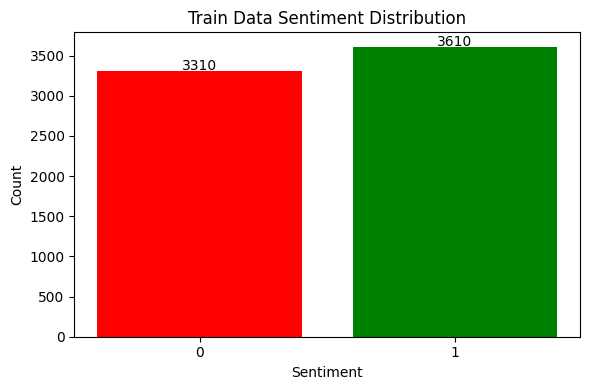

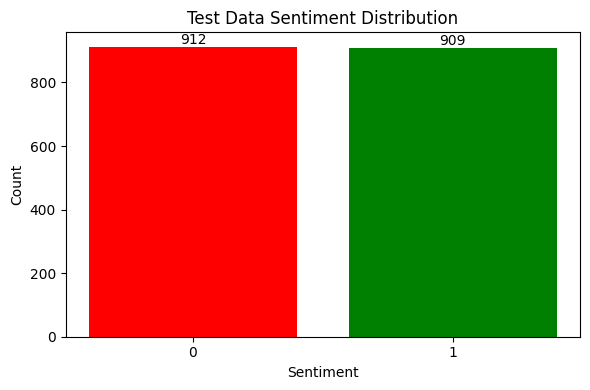


Model: SVM
Accuracy: 0.7985
Precision: 0.7765
Recall: 0.8372
F1 Score: 0.8057
Confusion Matrix:
[[693 219]
 [148 761]]
--------------------------------------------------

Model: KNN
Accuracy: 0.7342
Precision: 0.7184
Recall: 0.7690
F1 Score: 0.7428
Confusion Matrix:
[[638 274]
 [210 699]]
--------------------------------------------------

Model: Decision Tree
Accuracy: 0.6123
Precision: 0.6012
Recall: 0.6634
F1 Score: 0.6308
Confusion Matrix:
[[512 400]
 [306 603]]
--------------------------------------------------

Model: Random Forest
Accuracy: 0.7249
Precision: 0.7004
Recall: 0.7844
F1 Score: 0.7400
Confusion Matrix:
[[607 305]
 [196 713]]
--------------------------------------------------


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def parse_labeled_text(filepath):
    with open(filepath, encoding='utf-8') as file:
        lines = file.readlines()
    parsed_lines = [line.strip().split(maxsplit=1) for line in lines if line.strip()]
    label_list = [int(item[0]) for item in parsed_lines if len(item) == 2]
    text_list = [item[1].lower() for item in parsed_lines if len(item) == 2]
    return pd.DataFrame({'Sentiment': label_list, 'Review': text_list})

training_dataset = parse_labeled_text('stsa-train.txt')
testing_dataset = parse_labeled_text('stsa-test.txt')

print("Missing values in train data:\n", training_dataset.isnull().sum())
print("Missing values in test data:\n", testing_dataset.isnull().sum())

def visualize_label_distribution(dataframe, chart_title):
    label_counts = dataframe['Sentiment'].value_counts().sort_index()
    label_names = [str(label) for label in label_counts.index]
    color_palette = ['red', 'green', 'blue'][:len(label_names)]
    plt.figure(figsize=(6, 4))
    plt.bar(label_names, label_counts, color=color_palette)
    plt.title(chart_title)
    plt.ylabel("Count")
    plt.xlabel("Sentiment")
    for index, value in enumerate(label_counts):
        plt.text(index, value + 10, str(value), ha='center')
    plt.tight_layout()
    plt.show()

visualize_label_distribution(training_dataset, "Train Data Sentiment Distribution")
visualize_label_distribution(testing_dataset, "Test Data Sentiment Distribution")

text_transformer = TfidfVectorizer(max_features=10000)
train_text, validation_text, train_labels, validation_labels = train_test_split(
    training_dataset['Review'], training_dataset['Sentiment'], test_size=0.2, random_state=42)

train_vectors = text_transformer.fit_transform(train_text)
validation_vectors = text_transformer.transform(validation_text)
test_vectors = text_transformer.transform(testing_dataset['Review'])

model_registry = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

evaluation_summary = {}
for classifier_name, classifier in model_registry.items():
    classifier.fit(train_vectors, train_labels)
    test_predictions = classifier.predict(test_vectors)

    model_accuracy = accuracy_score(testing_dataset['Sentiment'], test_predictions)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(
        testing_dataset['Sentiment'], test_predictions, average='binary')
    model_confusion = confusion_matrix(testing_dataset['Sentiment'], test_predictions)

    evaluation_summary[classifier_name] = {
        'Accuracy': model_accuracy,
        'Precision': model_precision,
        'Recall': model_recall,
        'F1 Score': model_f1,
        'Confusion Matrix': model_confusion
    }

for classifier_name, metrics in evaluation_summary.items():
    print(f"\nModel: {classifier_name}")
    for metric_name, metric_value in metrics.items():
        if metric_name == 'Confusion Matrix':
            print(f"{metric_name}:\n{metric_value}")
        else:
            print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 50)


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [5]:
!pip install sympy==1.12 --quiet


<ipython-input-2-df9b4b8da05e>:16: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  review_data = pd.read_csv("Amazon_Unlocked_Mobile.csv", on_bad_lines='skip', quoting=3, encoding='utf-8')


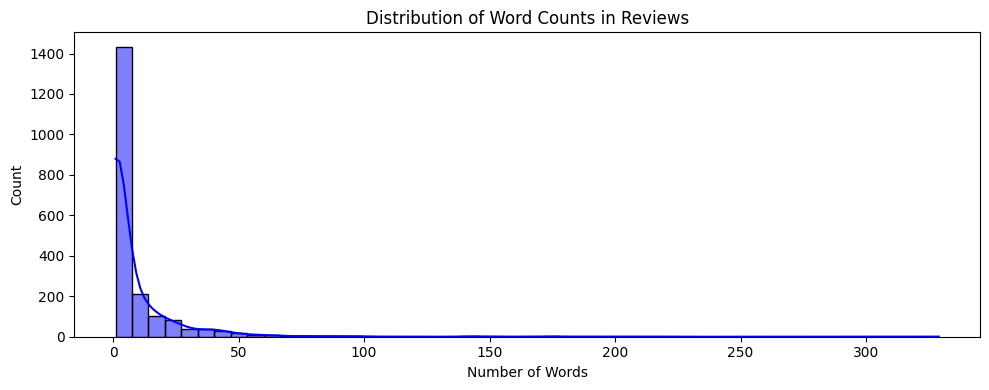

100%|██████████| 2000/2000 [04:02<00:00,  8.26it/s]


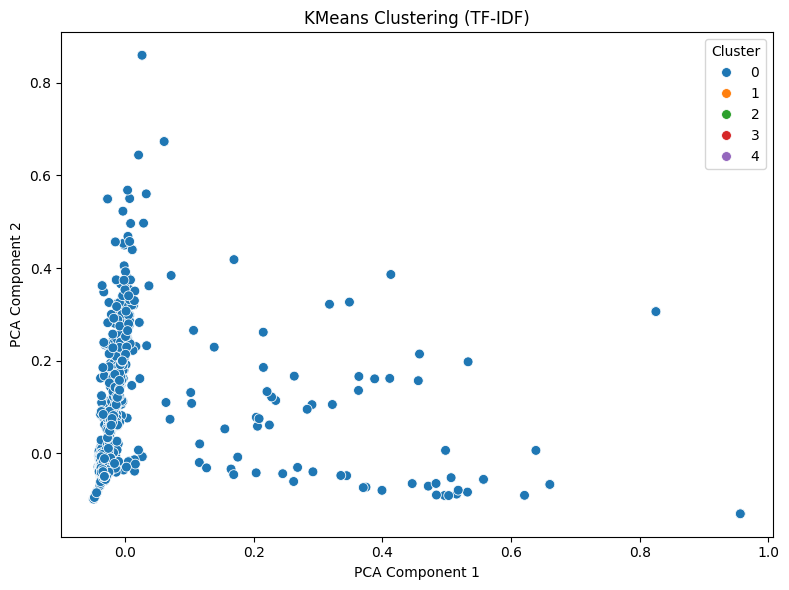

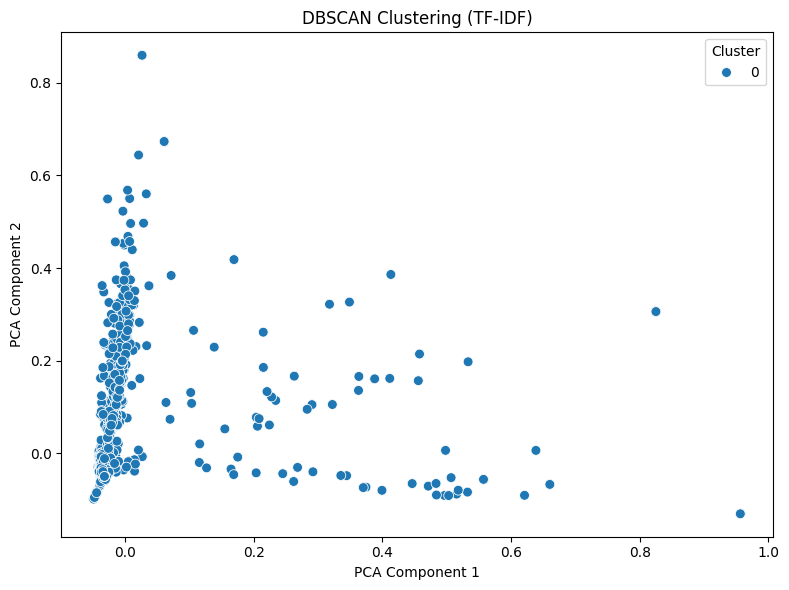

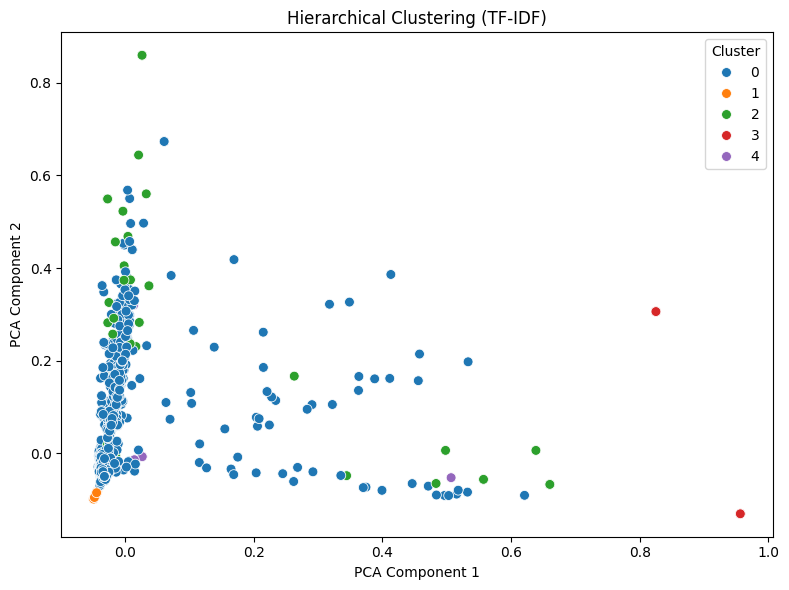

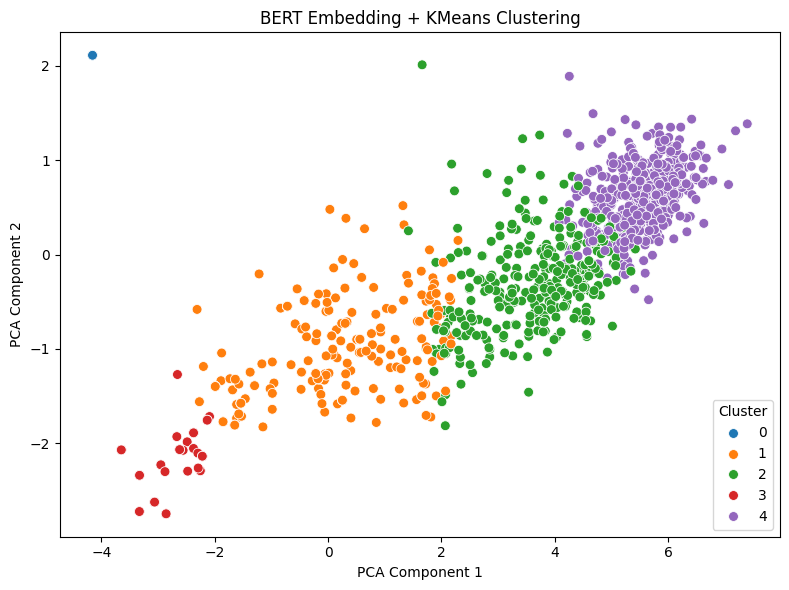

In [2]:
!pip install -q sympy==1.12
!pip install -q transformers umap-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

review_data = pd.read_csv("Amazon_Unlocked_Mobile.csv", on_bad_lines='skip', quoting=3, encoding='utf-8')
review_data = review_data.dropna(subset=['Reviews']).copy()
review_data = review_data.sample(2000, random_state=42)

review_data['Reviews'] = review_data['Reviews'].astype(str).str.lower()
review_data['Token_Count'] = review_data['Reviews'].apply(lambda x: len(x.split()))
review_data['Character_Count'] = review_data['Reviews'].apply(lambda x: len(x))

plt.figure(figsize=(10, 4))
sns.histplot(review_data['Token_Count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()

text_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = text_vectorizer.fit_transform(review_data['Reviews'])

kmeans_model = KMeans(n_clusters=5, random_state=42)
review_data['KMeans_Cluster'] = kmeans_model.fit_predict(tfidf_matrix)

dbscan_model = DBSCAN(eps=1.2, min_samples=5, metric='cosine')
review_data['DBSCAN_Cluster'] = dbscan_model.fit_predict(tfidf_matrix)

agglo_model = AgglomerativeClustering(n_clusters=5)
review_data['Agglomerative_Cluster'] = agglo_model.fit_predict(tfidf_matrix.toarray())

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def extract_bert_embedding(text_input):
    encoded = bert_tokenizer(text_input, return_tensors="pt", truncation=True, padding=True, max_length=64)
    with torch.no_grad():
        output = bert_model(**encoded)
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

bert_feature_matrix = np.array([extract_bert_embedding(text) for text in tqdm(review_data['Reviews'])])
bert_cluster_model = KMeans(n_clusters=5, random_state=42)
review_data['BERT_Cluster'] = bert_cluster_model.fit_predict(bert_feature_matrix)

def visualize_clusters(data_points, labels, chart_title):
    pca_model = PCA(n_components=2)
    coordinates = pca_model.fit_transform(data_points.toarray() if hasattr(data_points, 'toarray') else data_points)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=coordinates[:, 0], y=coordinates[:, 1], hue=labels, palette='tab10', s=50)
    plt.title(chart_title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

visualize_clusters(tfidf_matrix, review_data['KMeans_Cluster'], "KMeans Clustering (TF-IDF)")
visualize_clusters(tfidf_matrix, review_data['DBSCAN_Cluster'], "DBSCAN Clustering (TF-IDF)")
visualize_clusters(tfidf_matrix, review_data['Agglomerative_Cluster'], "Hierarchical Clustering (TF-IDF)")
visualize_clusters(bert_feature_matrix, review_data['BERT_Cluster'], "BERT Embedding + KMeans Clustering")


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

Firstly, The Amazon review dataset analysis using clustering methods demonstrated various advantages and weaknesses when implemented as part of the study.

The K-Means clustering algorithm reached good performance when using TF-IDF because it produced sharp cluster separations using fixed group counts yet its results depended on initial values and showed reduced flexibility toward noisy data.

DBSCAN exhibited resistance to noise points and found clusters of any form but showed limited effectiveness when analyzing text which contains sparse high-dimensional data.

The hierarchical clustering algorithm successfully displayed the review clustering structure yet proved expensive to compute and tended to fit the data excessively in sparse review sets.

The BERT-based clustering method created the most relevant clusters through semantic embedding capabilities that extracted contextual meaning within reviews as it demonstrated better performance than other approaches when post-PCA visualization was applied.

The combination of K-Means clustering algorithm with BERT embeddings yielded better semantic groupings than traditional methods working with TF-IDF features yet delivered superior interpretability of the results.





# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

